In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [12]:

tranform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train= True, download= True, transform=tranform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size= 64, shuffle=True)

In [13]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [ ]:
class LinearAutoencoder(nn.Module):
    def __init__(self):

        super().__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )

        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

        pass

    def forward(self, x):

        encoded= self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

        pass


model = LinearAutoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 1e-3, weight_decay= 1e-5)

In [14]:
class Autoencoder(nn.Module):
    def __init__(self):
        #N, 1, 28, 28
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride= 2, padding=1), #N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride= 2, padding=1), #N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7) #N, 64, 1, 1
        )

        #N, 64, 1, 1
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7), #N, 32, 7, 7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), #N, 16, 13, 13 -> N, 16, 14, 14 using output padding
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

        pass

    def forward(self, x):

        encoded= self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

        pass


model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 1e-3, weight_decay= 1e-5)

In [15]:
num_epochs = 30
outputs = []

for epoch in range(num_epochs):
    for (img,_) in data_loader:
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')
    outputs.append((epoch, img, recon))


Epoch: 1, Loss: 0.0096
Epoch: 2, Loss: 0.0051
Epoch: 3, Loss: 0.0046
Epoch: 4, Loss: 0.0036
Epoch: 5, Loss: 0.0034
Epoch: 6, Loss: 0.0029
Epoch: 7, Loss: 0.0032
Epoch: 8, Loss: 0.0033
Epoch: 9, Loss: 0.0025
Epoch: 10, Loss: 0.0033
Epoch: 11, Loss: 0.0030
Epoch: 12, Loss: 0.0031
Epoch: 13, Loss: 0.0028
Epoch: 14, Loss: 0.0028
Epoch: 15, Loss: 0.0024
Epoch: 16, Loss: 0.0027
Epoch: 17, Loss: 0.0028
Epoch: 18, Loss: 0.0029
Epoch: 19, Loss: 0.0024
Epoch: 20, Loss: 0.0024
Epoch: 21, Loss: 0.0025
Epoch: 22, Loss: 0.0028
Epoch: 23, Loss: 0.0022
Epoch: 24, Loss: 0.0027
Epoch: 25, Loss: 0.0026
Epoch: 26, Loss: 0.0028
Epoch: 27, Loss: 0.0027
Epoch: 28, Loss: 0.0031
Epoch: 29, Loss: 0.0019
Epoch: 30, Loss: 0.0027


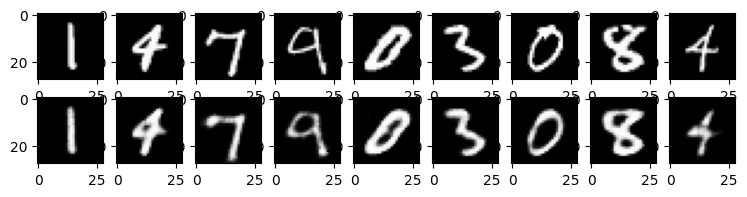

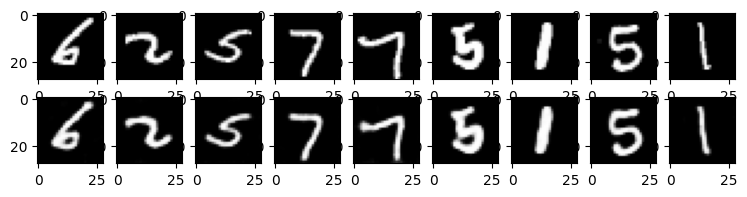

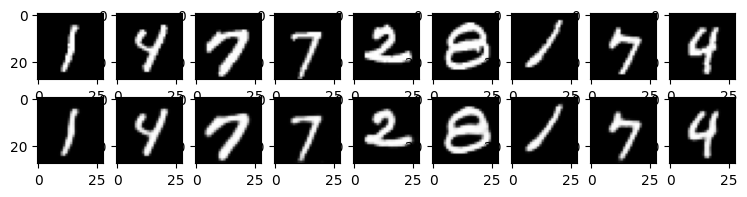

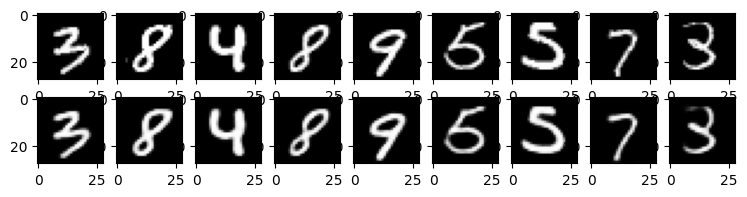

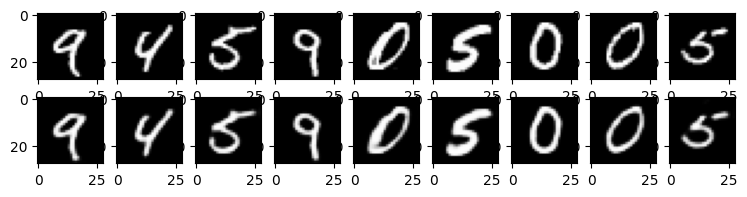

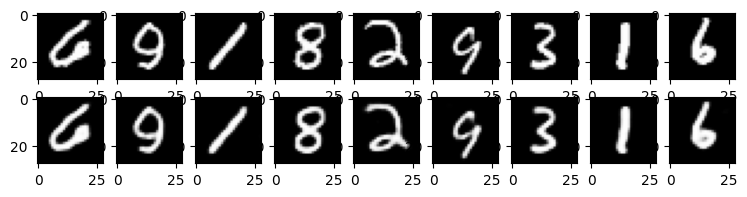

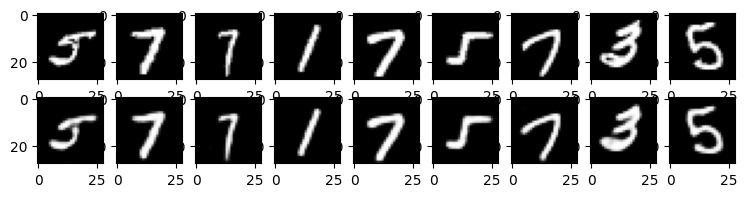

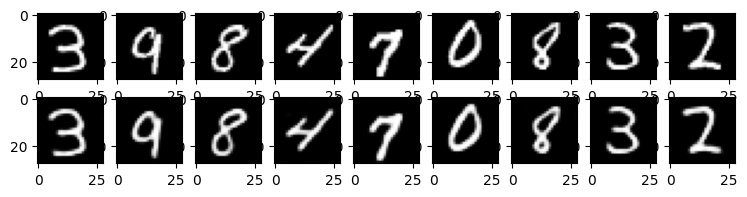

In [16]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >=9: break
        plt.subplot(2, 9, i+1)
        #item 1, 28,28
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >=9: break
        plt.subplot(2, 9, 9+i+1) #row_length +i +1
        plt.imshow(item[0])